## How to access Hi-C map from .ccmap file?

`.ccmap` is a text file and associated `*.npbin` or `*.npbin.gz` is memory mapped matrix file.

***

**At first, we import modules:**

* [gcMapExplorer.lib](../apidoc/summary.html)
* [numpy](http://docs.scipy.org/doc/numpy/reference/routines.html) for statistics
* [matplotlib](http://matplotlib.org/gallery.html) for plotting

In [1]:
import gcMapExplorer.lib as gmlib
import numpy as np
import matplotlib.pyplot as plt

# To show inline plots
%matplotlib inline
plt.style.use('ggplot')              # Theme for plotting

#### Load a `.ccmap` file

In [2]:
ccmap = gmlib.ccmap.load_ccmap('normalized/chr15_100kb_normKR.ccmap')

**Print some properties of Hi-C data**

In [3]:
print('shape: ', ccmap.shape)             # Shape of matrix along X and Y axis
print('Minimum value: ', ccmap.minvalue)  # Maximum value in Hi-C data
print('Maximum value: ', ccmap.maxvalue)  # Minimum value in Hi.C data
print('data-type: ', ccmap.dtype)         #  Data type for memory mapped matrix file
print('path to matrix file:', ccmap.path2matrix)

shape:  (1026, 1026)
Minimum value:  4.66654819319956e-06
Maximum value:  0.8729197978973389
data-type:  float32
path to matrix file: /home/rajendra/deskForWork/scratch/npBinary_g20uc8yo.tmp


***

#### Reading ``*.npbin`` file

In [4]:
ccmap.make_readable()         # npbin file is now readable


Now, Hi-C matrix is available as ``ccmap.matrix``.

***

#### Overview of Hi-C matrix

In [5]:
print(ccmap.matrix)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.27888188  0.13513692
   0.07627077]
 [ 0.          0.          0.         ...,  0.13513692  0.45601341  0.        ]
 [ 0.          0.          0.         ...,  0.07627077  0.          0.        ]]


***

#### Using numpy module

* We can use numpy module to compare properties from ``.ccmap`` file and from ``.npbin`` file.

* To find maximum and minimum of matrix, numpy functions [amin](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.amin.html) and [amax](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.amax.html) can be used.

In [6]:
print('shape: ', ccmap.shape, ccmap.matrix.shape)                # Shape of matrix along X and Y axis
print('Minimum value: ', ccmap.minvalue, np.amin(ccmap.matrix))  # Minimum value in Hi-C data using numpy.amin
print('Maximum value: ', ccmap.maxvalue, np.amax(ccmap.matrix))  # Maximum value in Hi.C data using numpy.amax


shape:  (1026, 1026) (1026, 1026)
Minimum value:  4.66654819319956e-06 0.0
Maximum value:  0.8729197978973389 0.87292


***

#### Remove rows/columns with missing data

In [7]:
bData = ~ccmap.bNoData                          # Stores whther rows/columns has missing data
new_matrix = (ccmap.matrix[bData,:])[:,bData]   # Getting new matrix after removing row/columns of missing data
index_bData = np.nonzero(bData)[0]               # Getting indices of original matrix after removing missing data

print('Original shape: ', ccmap.matrix.shape)   # Shape of original matrix
print('New shape: ', new_matrix.shape)           # Shape of new matrix

Original shape:  (1026, 1026)
New shape:  (822, 822)


***

#### Whether matrix is balanced after KR normalization?

If matrix is balanced, sum of rows and coloumns should be one and variance should be almost equal. Sum and variance of rows and columns can be easily calculated using [numpy.sum](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.sum.html) and [numpy.var](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html) functions, respectively.

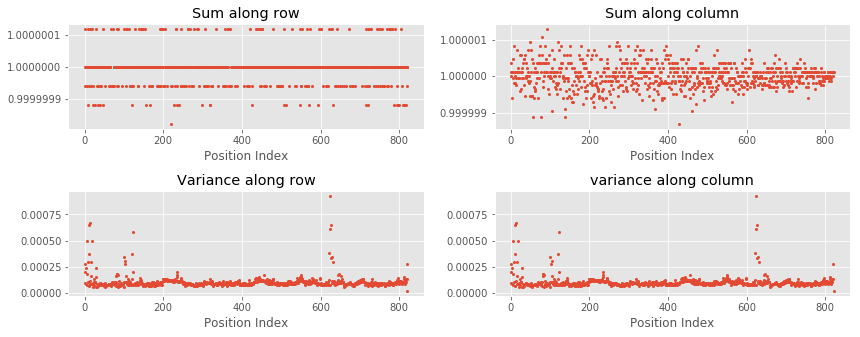

In [8]:
r_sum = np.sum(new_matrix, axis = 0)             # Sum along row using numpy.sum
r_var = np.var(new_matrix, axis = 0)             # Variance along row using numpy.var

c_sum = np.sum(new_matrix, axis = 1)             # Sum along column using numpy.sum
c_var = np.var(new_matrix, axis = 1)             # Variance along column using numpy.var

# Plot the values for visual representations
fig = plt.figure(figsize=(14,5))                               # Figure size
fig.subplots_adjust(hspace=0.6)                                # Space between plots

ax1 = fig.add_subplot(2,2,1)                                   # Axes first plot
ax1.set_title('Sum along row')                                 # Title first plot
ax1.set_xlabel('Position Index')                               # X-label

ax2 = fig.add_subplot(2,2,2)                                   # Axes second plot
ax2.set_title('Sum along column')
ax2.set_xlabel('Position Index')

ax3 = fig.add_subplot(2,2,3)                                   # Axes third plot
ax3.set_title('Variance along row')                            
ax3.set_xlabel('Position Index')                              

ax4 = fig.add_subplot(2,2,4)                                   # Axes fourth plot                                   
ax4.set_title('variance along column')
ax4.set_xlabel('Position Index')

ax1.plot(r_sum, marker='o', lw=0, ms=2)                        # Plot in first axes
ax2.plot(c_sum, marker='o', lw=0, ms=2)                        # Plot in second axes
ax3.plot(r_var, marker='o', lw=0, ms=2)                        # Plot in third axes
ax4.plot(c_var, marker='o', lw=0, ms=2)                        # Plot in fourth axes

ax1.get_yaxis().get_major_formatter().set_useOffset(False)     # Prevent ticks auto-formatting
ax2.get_yaxis().get_major_formatter().set_useOffset(False)
ax3.get_yaxis().get_major_formatter().set_useOffset(False)     
ax4.get_yaxis().get_major_formatter().set_useOffset(False)

plt.show()

**Result**

As can be seen in the above plots, sums of rows and columns are equal to one. Additionally, variances of rows and columns are also almost equal.

***

#### Using more numpy modules

Lets plot average and median of each rows using [numpy.mean](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.mean.html) and [numpy.median](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.median.html).

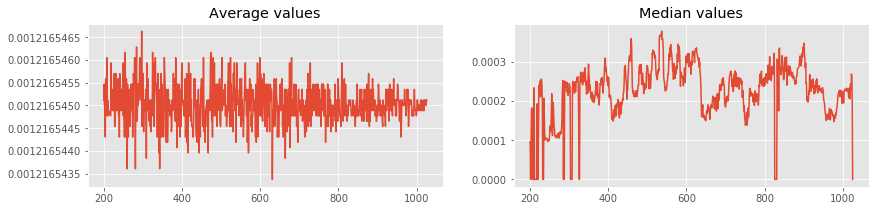

In [9]:
averages = np.mean(new_matrix, axis = 1)            # Calculating mean using numpy.mean
medians = np.median(new_matrix, axis = 1)           # Calculating median using numpy.median

# Plot the values for visual representations
fig = plt.figure(figsize=(14,3))                               # Figure size

ax1 = fig.add_subplot(1,2,1)                                   # Axes first plot
ax1.set_title('Average values')                                 # Title first plot
ax1.get_yaxis().get_major_formatter().set_useOffset(False)     # Prevent ticks auto-formatting

ax2 = fig.add_subplot(1,2,2)                                   # Axes second plot
ax2.set_title('Median values')
ax2.get_yaxis().get_major_formatter().set_useOffset(False)

# in below both plots, x-axis is index from original matrix to preserve original location
ax1.plot(index_bData, averages)   # Plot in first axes
ax2.plot(index_bData, medians)    # Plot in second axes

plt.show()


